In [190]:
# coding: UTF-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import xlwt
from openpyxl import load_workbook
import os
import math
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams["font.family"] = "SimHei" # 设置全局中文字体为黑体
import matplotlib.ticker as ticker
from adjustText import adjust_text


In [2]:
"""
https://askubuntu.com/questions/659305/package-ttf-mscorefonts-installer-has-no-installation-candidate
echo deb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty multiverse
deb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty-updates multiverse
deb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty-backports main restricted universe multiverse" | sudo tee /etc/apt/sources.list.d/multiverse.list 
sudo apt-get update
sudo apt-get install ttf-mscorefonts-installer
"""

'\nhttps://askubuntu.com/questions/659305/package-ttf-mscorefonts-installer-has-no-installation-candidate\necho deb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty multiverse\ndeb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty-updates multiverse\ndeb http://us-west-2.ec2.archive.ubuntu.com/ubuntu/ trusty-backports main restricted universe multiverse" | sudo tee /etc/apt/sources.list.d/multiverse.list \nsudo apt-get update\nsudo apt-get install ttf-mscorefonts-installer\n'

In [3]:
# 清华ssp读取
th_pop_ssp1=pd.read_csv("population_data/tsinghua/SSP1_2010_2100.csv",index_col=0)
th_pop_ssp2=pd.read_csv("population_data/tsinghua/SSP2_2010_2100.csv",index_col=0)
th_pop_ssp3=pd.read_csv("population_data/tsinghua/SSP3_2010_2100.csv",index_col=0)
th_pop_ssp4=pd.read_csv("population_data/tsinghua/SSP4_2010_2100.csv",index_col=0)
th_pop_ssp5=pd.read_csv("population_data/tsinghua/SSP5_2010_2100.csv",index_col=0)


In [4]:
# 南信大ssp读取
jt_pop_ssp1=pd.read_csv("population_data/jiangtong/ssp1_province.csv",index_col=1)
jt_pop_ssp2=pd.read_csv("population_data/jiangtong/ssp2_province.csv",index_col=1)
jt_pop_ssp3=pd.read_csv("population_data/jiangtong/ssp3_province.csv",index_col=1)
jt_pop_ssp4=pd.read_csv("population_data/jiangtong/ssp4_province.csv",index_col=1)
jt_pop_ssp5=pd.read_csv("population_data/jiangtong/ssp5_province.csv",index_col=1)

#jt_pops=pd.concat([jt_pop_ssp1,jt_pop_ssp2,jt_pop_ssp3,jt_pop_ssp4,jt_pop_ssp5],sort=False)

In [5]:
jt_pop_ssp1=jt_pop_ssp1.iloc[:,2:93]
jt_pop_ssp1=jt_pop_ssp1.T
jt_pop_ssp1.index=th_pop_ssp1.index
th_pop_ssp1=th_pop_ssp1.sort_index(axis=1)
jt_pop_ssp1=jt_pop_ssp1.sort_index(axis=1)
th_pop_ssp1.columns=jt_pop_ssp1.columns

jt_pop_ssp2=jt_pop_ssp2.iloc[:,2:93]
jt_pop_ssp2=jt_pop_ssp2.T
jt_pop_ssp2.index=th_pop_ssp2.index
th_pop_ssp2=th_pop_ssp2.sort_index(axis=1)
jt_pop_ssp2=jt_pop_ssp2.sort_index(axis=1)
th_pop_ssp2.columns=jt_pop_ssp2.columns

jt_pop_ssp3=jt_pop_ssp3.iloc[:,2:93]
jt_pop_ssp3=jt_pop_ssp3.T
jt_pop_ssp3.index=th_pop_ssp3.index
th_pop_ssp3=th_pop_ssp3.sort_index(axis=1)
jt_pop_ssp3=jt_pop_ssp3.sort_index(axis=1)
th_pop_ssp3.columns=jt_pop_ssp3.columns

jt_pop_ssp4=jt_pop_ssp4.iloc[:,2:93]
jt_pop_ssp4=jt_pop_ssp4.T
jt_pop_ssp4.index=th_pop_ssp4.index
th_pop_ssp4=th_pop_ssp4.sort_index(axis=1)
jt_pop_ssp4=jt_pop_ssp4.sort_index(axis=1)
th_pop_ssp4.columns=jt_pop_ssp4.columns

jt_pop_ssp5=jt_pop_ssp5.iloc[:,2:93]
jt_pop_ssp5=jt_pop_ssp5.T
jt_pop_ssp5.index=th_pop_ssp5.index
th_pop_ssp5=th_pop_ssp5.sort_index(axis=1)
jt_pop_ssp5=jt_pop_ssp5.sort_index(axis=1)
th_pop_ssp5.columns=jt_pop_ssp5.columns


In [6]:
pop_true=pd.read_excel('population_data/pop_true_update.xlsx',index_col=0).T*10000
pop_true=pop_true.sort_index(axis=1)
#pop_true.head()

In [7]:
jt_pops={"ssp1":jt_pop_ssp1,"ssp2":jt_pop_ssp2,"ssp3":jt_pop_ssp3,"ssp4":jt_pop_ssp4,"ssp5":jt_pop_ssp5}
th_pops={"ssp1":th_pop_ssp1,"ssp2":th_pop_ssp2,"ssp3":th_pop_ssp3,"ssp4":th_pop_ssp4,"ssp5":th_pop_ssp5}

# jp_pops={"ssp1":jp_pop_ssp1,"ssp2":jp_pop_ssp2,"ssp3":jp_pop_ssp3}

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

r2=pd.DataFrame([],columns=['jt','th'],index=['ssp1','ssp2','ssp3','ssp4','ssp5'])

for i in range(0,5):

    jt_sum=jt_pops["ssp{i}".format(i=0+1)].iloc[0:9,:]
    
    th_sum=th_pops["ssp{i}".format(i=i+1)].iloc[0:9,:]
    
    

    cor_data=pd.DataFrame([jt_pops["ssp{i}".format(i=i+1)].sum(1).iloc[0:9].values,th_pops["ssp{i}".format(i=i+1)].sum(1).iloc[0:9].values],index=['jt','th'],columns=np.arange(2010,2019,1))
    cor_data=cor_data.T
    
    jt_r,p = stats.pearsonr(cor_data.jt,pop_true.sum(1).values)  # 相关系数和P值
    th_r,p = stats.pearsonr(cor_data.th,pop_true.sum(1).values)
    
#     print(jt_r)
#     print(th_r)
    
    r2.iloc[i,0]=r2_score(pop_true.sum(1).values,cor_data.jt)
    r2.iloc[i,1]=r2_score(pop_true.sum(1).values,cor_data.th)

#     print(f"测试集1R^2：{r2_score(pop_true.sum(1).values,cor_data.jt)}")
#     print(f"测试集2R^2：{r2_score(pop_true.sum(1).values,cor_data.th)}")
    
#     print('--')
    


In [9]:
plt.rc('font',family='Times New Roman')
# plt.style.use('default')



# fig1. 两套数据集整体的比较


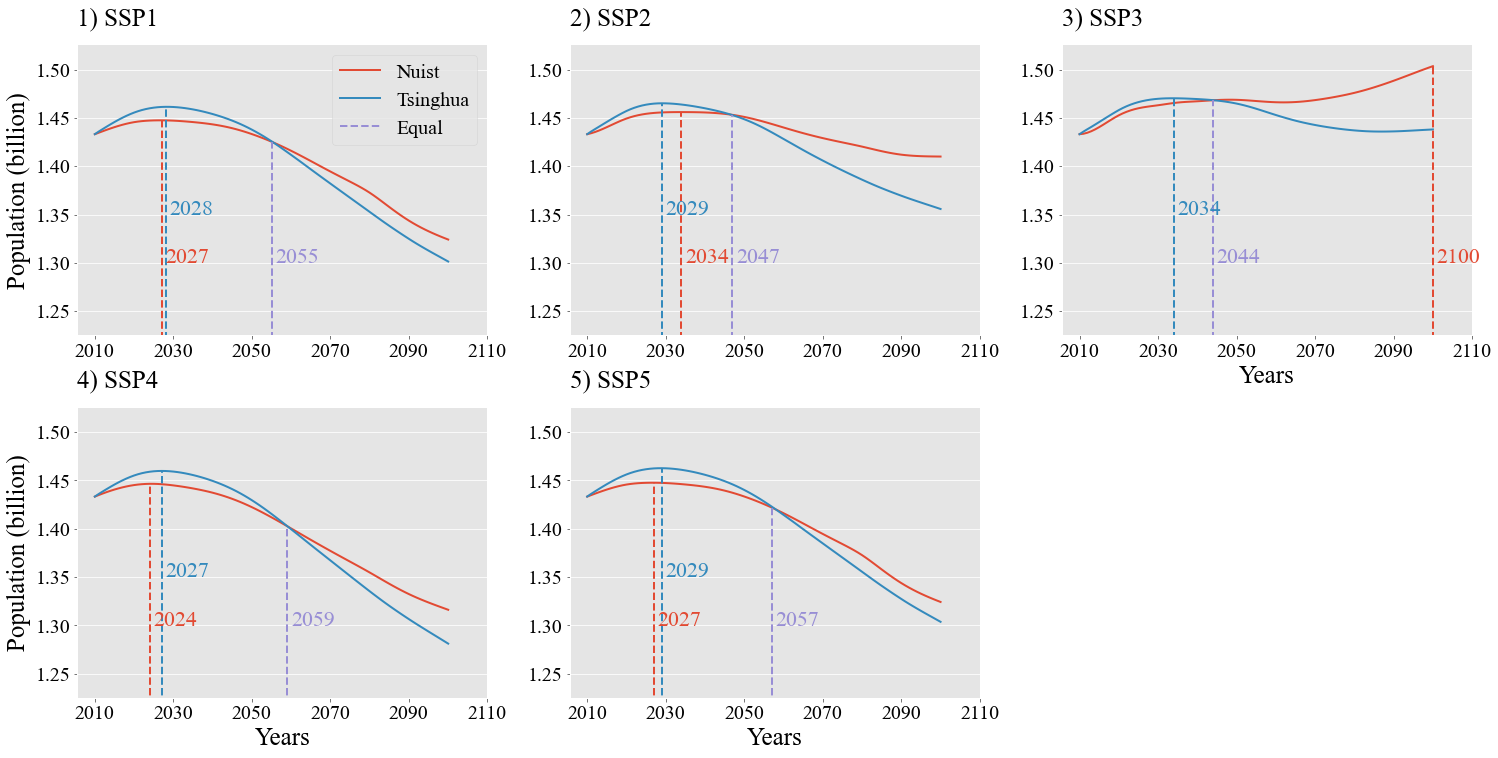

In [10]:
# %matplotlib widget

from matplotlib.lines import Line2D

ax=plt.figure(figsize=(25,12))

x=th_pop_ssp1.index.values


for i in range(0,5):
    
    jt_sum=jt_pops["ssp{i}".format(i=i+1)].sum(1)
    th_sum=th_pops["ssp{i}".format(i=i+1)].sum(1)
    

    
    plt.subplot(2,3,i+1)
    plt.title("{i}) SSP{i}".format(i=i+1),fontdict={"size":25,'weight':"heavy","family":"Times new roman"}
              ,loc="left",y=1.05)
    
    
    plt.plot(x,jt_sum,linewidth=2)
    
    plt.plot(x,th_sum,linewidth=2)
      
    
    plt.ylim(0.5*10**9,1.7*10**9)

    ax = plt.gca()
    ax.set_yticklabels(['1.20', '1.25', '1.30', '1.35','1.40', '1.45','1.50', '1.55','1.60'],fontdict={"color":"black","size":20,"family":"Times new roman"})
    plt.xticks(color="black",fontsize=20,family="Times new roman",ticks=np.arange(2010,2120,20))

    
    same_x=[2055,2047,2044,2059,2057]
    
    line1 = [(same_x[i], 0), (same_x[i], jt_sum[same_x[i]])]    
    (line1_xs, line1_ys) = zip(*line1)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=2, color='#988ED5', linestyle='dashed'))
    ax.text(same_x[i]+1, 0.8*10**9,str(same_x[i]),fontdict={"size":22,"color":'#988ED5',"family":"Times new roman"})
    
    # jt 最大值出现年份
    max_jt=jt_sum.max()
    max_jt_index=jt_sum[jt_sum.values == max_jt].index.values[0]    
    line1 = [(max_jt_index, 0), (max_jt_index, max_jt)]    
    (line1_xs, line1_ys) = zip(*line1)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=2, color='#E24A33', linestyle='dashed'))
    ax.text(max_jt_index+1, 0.8*10**9,str(max_jt_index),fontdict={"size":22,"color":'#E24A33',"family":"Times new roman"})
 
    # th 最大值出现年份
    max_th=th_sum.max()
    max_th_index=th_sum[th_sum.values == max_th].index.values[0]    
    line1 = [(max_th_index, 0), (max_th_index, max_th)]    
    (line1_xs, line1_ys) = zip(*line1)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=2, color='#348ABD', linestyle='dashed'))
    ax.text(max_th_index+1, 1*10**9,str(max_th_index),fontdict={"size":22,"color":'#348ABD',"family":"Times new roman"})
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    
    if(i==0 or i==3):
        ax.set_ylabel("Population (billion)",fontdict={"color":"black","size":25,'weight':"heavy","family":"Times new roman"})
    if(i==0):
        plt.legend(["Nuist","Tsinghua","Equal"],prop = {'size':20,'weight':"heavy","family":"Times new roman"})
    if(i==4 or i==3 or i==2):
        ax.set_xlabel("Years",fontdict={"color":"black","size":25,'weight':"heavy","family":"Times new roman"})
    plt.grid(axis="x")
plt.subplots_adjust(hspace =0.25)#调整子图间距

plt.savefig("population_data/output/sum_compare.pdf",dpi=600,bbox_inches='tight')    
plt.show()

# fig2. 整体预测数据与实际数据的比较


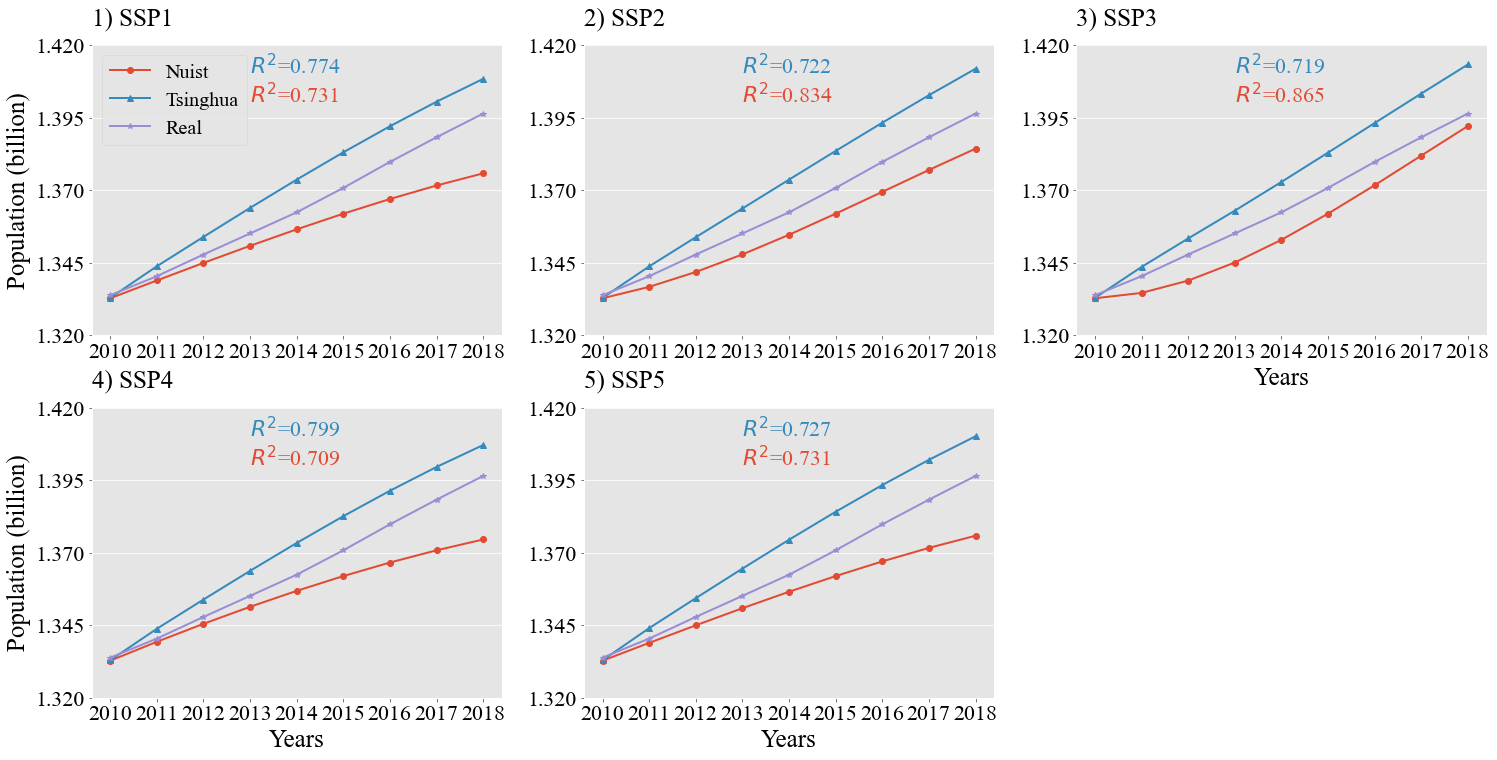

In [11]:
from matplotlib.lines import Line2D

ax=plt.figure(figsize=(25,12))

x=np.arange(2010,2019,1)

for i in range(0,5):
    
    jt_sum=jt_pops["ssp{i}".format(i=i+1)].sum(1).iloc[0:9]
    th_sum=th_pops["ssp{i}".format(i=i+1)].sum(1).iloc[0:9]
    
    plt.subplot(2,3,i+1)
    plt.title("{i}) SSP{i}".format(i=i+1),fontdict={"size":25,'weight':"bold","family":"Times new roman"},loc="left",y=1.05)
    plt.plot(x,jt_sum,color='#E24A33',linestyle="-",marker='o',linewidth=2)
    plt.plot(x,th_sum,color='#348ABD',linestyle="-",marker='^',linewidth=2)
    plt.plot(x,pop_true.sum(1).iloc[0:9],color='#988ED5',marker='*',linestyle="-",linewidth=2)
   

    plt.ylim(1.32*10**9,1.42*10**9)    
    plt.yticks(np.linspace(1.32*10**9,1.42*10**9,5))
    

    plt.text(2013, 1.40*10**9, '${R^2}$='+'%.3f'%r2.iloc[i,0], ha='left', wrap=True,fontdict={'size':22,'color':'#E24A33',"family":"Times new roman"})
    plt.text(2013, 1.41*10**9, '${R^2}$='+'%.3f'%r2.iloc[i,1], ha='left', wrap=True,fontdict={'size':22,'color':'#348ABD',"family":"Times new roman"})

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.set_yticklabels(['1.320', '1.345', '1.370', '1.395','1.420'],fontdict={"color":"black","size":22,"family":"Times new roman"})
    ax.set_xticklabels(np.arange(2009,2019,1),fontdict={"color":"black","size":22,"family":"Times new roman"})

    if(i==0 or i==3):
        ax.set_ylabel("Population (billion)",fontdict={"color":"black","size":25,'weight':"heavy","family":"Times new roman"})
    if(i==0):
        plt.legend(["Nuist","Tsinghua","Real"],prop = {'size':20,"family":"Times new roman"})
    if(i==4 or i==3 or i==2):
        ax.set_xlabel("Years",fontdict={"color":"black","size":25,'weight':"heavy","family":"Times new roman"})
    plt.grid(axis="x")
plt.subplots_adjust(hspace =0.25)#调整子图间距

fig = plt.gcf()

plt.savefig("population_data/output/sum_compare_true.pdf",bbox_inches='tight',dpi=600) 

plt.show()

# fig3. 分省预测数据与实际数据的比较

In [184]:
# 清华ssp读取
th_pop_ssp1=pd.read_csv("population_data/tsinghua/SSP1_2010_2100.csv",index_col=0)
th_pop_ssp2=pd.read_csv("population_data/tsinghua/SSP2_2010_2100.csv",index_col=0)
th_pop_ssp3=pd.read_csv("population_data/tsinghua/SSP3_2010_2100.csv",index_col=0)
th_pop_ssp4=pd.read_csv("population_data/tsinghua/SSP4_2010_2100.csv",index_col=0)
th_pop_ssp5=pd.read_csv("population_data/tsinghua/SSP5_2010_2100.csv",index_col=0)

# 南信大ssp读取
jt_pop_ssp1=pd.read_csv("population_data/jiangtong/ssp1_province.csv",index_col=1)
jt_pop_ssp2=pd.read_csv("population_data/jiangtong/ssp2_province.csv",index_col=1)
jt_pop_ssp3=pd.read_csv("population_data/jiangtong/ssp3_province.csv",index_col=1)
jt_pop_ssp4=pd.read_csv("population_data/jiangtong/ssp4_province.csv",index_col=1)
jt_pop_ssp5=pd.read_csv("population_data/jiangtong/ssp5_province.csv",index_col=1)

jt_pop_ssp1=jt_pop_ssp1.iloc[:,2:93]
jt_pop_ssp1=jt_pop_ssp1.T
jt_pop_ssp1.index=th_pop_ssp1.index
th_pop_ssp1=th_pop_ssp1.sort_index(axis=1)
jt_pop_ssp1=jt_pop_ssp1.sort_index(axis=1)
th_pop_ssp1.columns=jt_pop_ssp1.columns

jt_pop_ssp2=jt_pop_ssp2.iloc[:,2:93]
jt_pop_ssp2=jt_pop_ssp2.T
jt_pop_ssp2.index=th_pop_ssp2.index
th_pop_ssp2=th_pop_ssp2.sort_index(axis=1)
jt_pop_ssp2=jt_pop_ssp2.sort_index(axis=1)
th_pop_ssp2.columns=jt_pop_ssp2.columns

jt_pop_ssp3=jt_pop_ssp3.iloc[:,2:93]
jt_pop_ssp3=jt_pop_ssp3.T
jt_pop_ssp3.index=th_pop_ssp3.index
th_pop_ssp3=th_pop_ssp3.sort_index(axis=1)
jt_pop_ssp3=jt_pop_ssp3.sort_index(axis=1)
th_pop_ssp3.columns=jt_pop_ssp3.columns

jt_pop_ssp4=jt_pop_ssp4.iloc[:,2:93]
jt_pop_ssp4=jt_pop_ssp4.T
jt_pop_ssp4.index=th_pop_ssp4.index
th_pop_ssp4=th_pop_ssp4.sort_index(axis=1)
jt_pop_ssp4=jt_pop_ssp4.sort_index(axis=1)
th_pop_ssp4.columns=jt_pop_ssp4.columns

jt_pop_ssp5=jt_pop_ssp5.iloc[:,2:93]
jt_pop_ssp5=jt_pop_ssp5.T
jt_pop_ssp5.index=th_pop_ssp5.index
th_pop_ssp5=th_pop_ssp5.sort_index(axis=1)
jt_pop_ssp5=jt_pop_ssp5.sort_index(axis=1)
th_pop_ssp5.columns=jt_pop_ssp5.columns

jt_pops={"ssp1":jt_pop_ssp1,"ssp2":jt_pop_ssp2,"ssp3":jt_pop_ssp3,"ssp4":jt_pop_ssp4,"ssp5":jt_pop_ssp5}
th_pops={"ssp1":th_pop_ssp1,"ssp2":th_pop_ssp2,"ssp3":th_pop_ssp3,"ssp4":th_pop_ssp4,"ssp5":th_pop_ssp5}
pop_true=pd.read_excel('population_data/pop_true_update.xlsx',index_col=0).T
pop_true=pop_true.sort_index(axis=1)
#pop_true

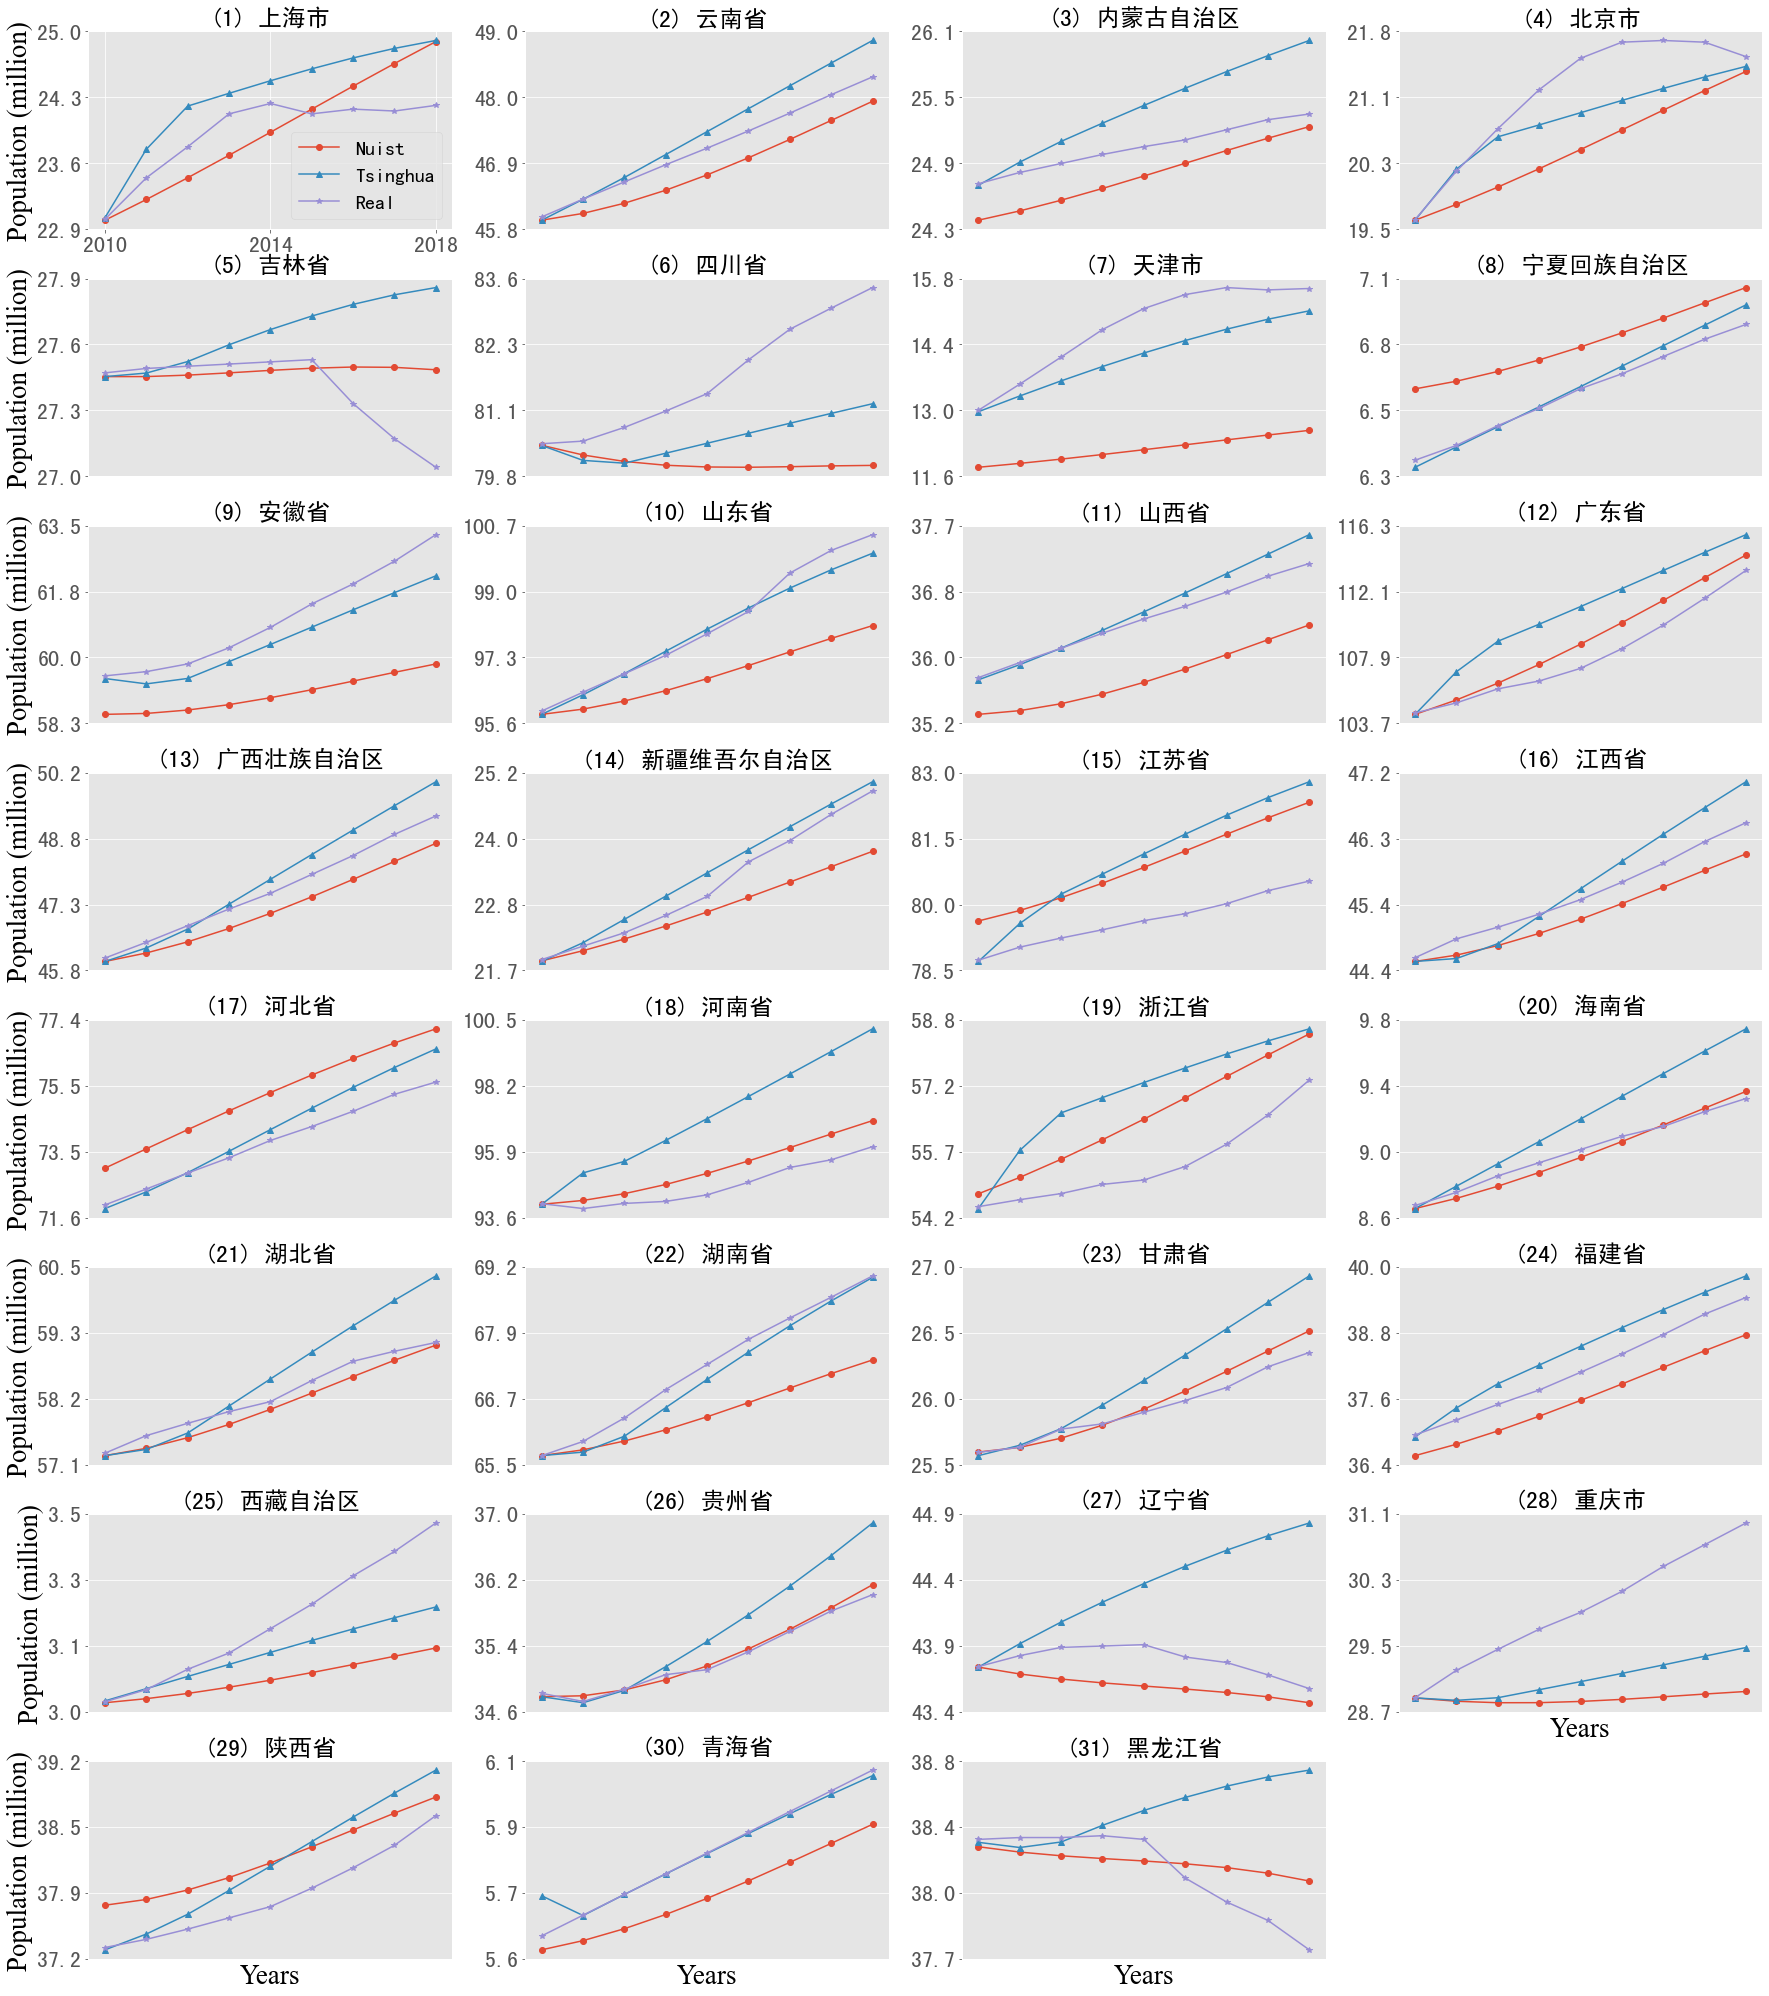

In [88]:
from matplotlib.ticker import FuncFormatter  

fig=plt.figure(figsize=(30,40))
pop_province_true=pop_true*10000

for i in range(0,31):
    
    ax=plt.subplot(9,4,i+1)
    ax.set_title("({num}) ".format(num=i+1)+pop_province_true.columns.values[i],fontdict={'fontsize':24})
    ax.plot(np.arange(2010,2019,1),jt_pop_ssp2.iloc[0:9,i]/10**6,'#E24A33',marker='o')
    ax.plot(np.arange(2010,2019,1),th_pop_ssp2.iloc[0:9,i]/10**6,'#348ABD',marker='^')
    ax.plot(np.arange(2010,2019,1),pop_province_true.iloc[0:9,i]/10**6,'#988ED5',marker='*')
    

    ax.set_xticks([])
    
    ymin,ymax=ax.get_ylim()
    interval=(ymax-ymin)/3
    ax.set_yticks(np.arange(ymin,ymax+0.001,interval))
   
    plt.tick_params(labelsize=22)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))# 将坐标轴的base number设置为一位

    if (i == 0):
        ax.legend(['Nuist','Tsinghua','Real'],fontsize=20)
        ax.set_xticks(np.arange(2010,2019,4))
    if(i in np.arange(0,36,4)):
        ax.set_ylabel("Population (million)",fontdict={"color":"black","size":27,'weight':"heavy","family":"Times new roman"})
    if(i in np.arange(27,32,1)):
        ax.set_xlabel("Years",fontdict={"color":"black","size":27,'weight':"heavy","family":"Times new roman"})
 
        
plt.subplots_adjust(wspace = 0.2, hspace =0.25)#调整子图间距
plt.savefig('population_data/output/10_18_true.pdf',dpi=600,bbox_inches='tight')
plt.show()


# fig4. 全国误差分布

In [127]:
ape_all_th=pd.read_csv("population_data/0817/th_ape_china.csv",index_col=0)
ape_all_jt=pd.read_csv("population_data/0817/jt_ape_china.csv",index_col=0)
pe_all_th=pd.read_csv("population_data/0817/th_pe_china.csv",index_col=0)
pe_all_jt=pd.read_csv("population_data/0817/jt_pe_china.csv",index_col=0)

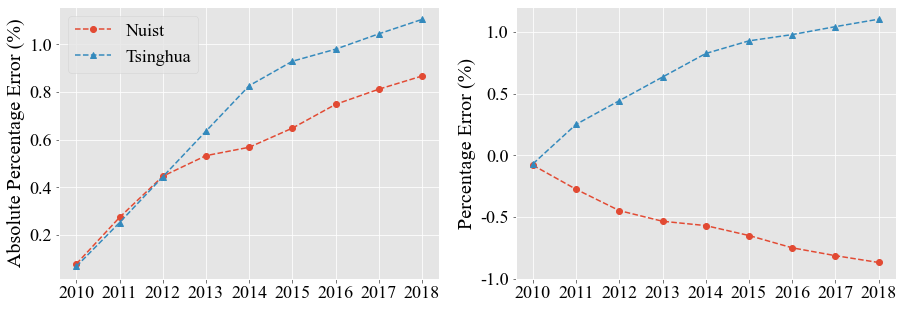

In [165]:
plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
plt.plot(ape_all_jt,'o--')
plt.plot(ape_all_th,'^--')
plt.yticks(fontproperties = 'Times New Roman', size = 18,color="k")
plt.xticks(fontproperties = 'Times New Roman', size = 18,color="k")
ax.set_ylabel("Absolute Percentage Error (%)",fontdict={"color":"black","size":20,'weight':"heavy","family":"Times new roman"})
plt.legend(['Nuist','Tsinghua'],prop = {'size':18,"family":"Times new roman"})

ax=plt.subplot(1,2,2)
plt.plot(pe_all_jt,'o--')
plt.plot(pe_all_th,'^--')
plt.yticks(np.arange(-1,1.01,0.5),fontproperties = 'Times New Roman', size = 18,color="k")
plt.xticks(fontproperties = 'Times New Roman', size = 18,color="k")
ax.set_ylabel("Percentage Error (%)",fontdict={"color":"black","size":20,'weight':"heavy","family":"Times new roman"})

plt.savefig('population_data/output/sum_ape_pe.pdf',dpi=600,bbox_inches='tight')
plt.show()


# fig5. 分省误差分布
## 分省PE

In [69]:
jt_pe=pd.read_csv("population_data/0817/jt_pe_provinces.csv",index_col=0)
th_pe=pd.read_csv("population_data/0817/th_pe_provinces.csv",index_col=0)

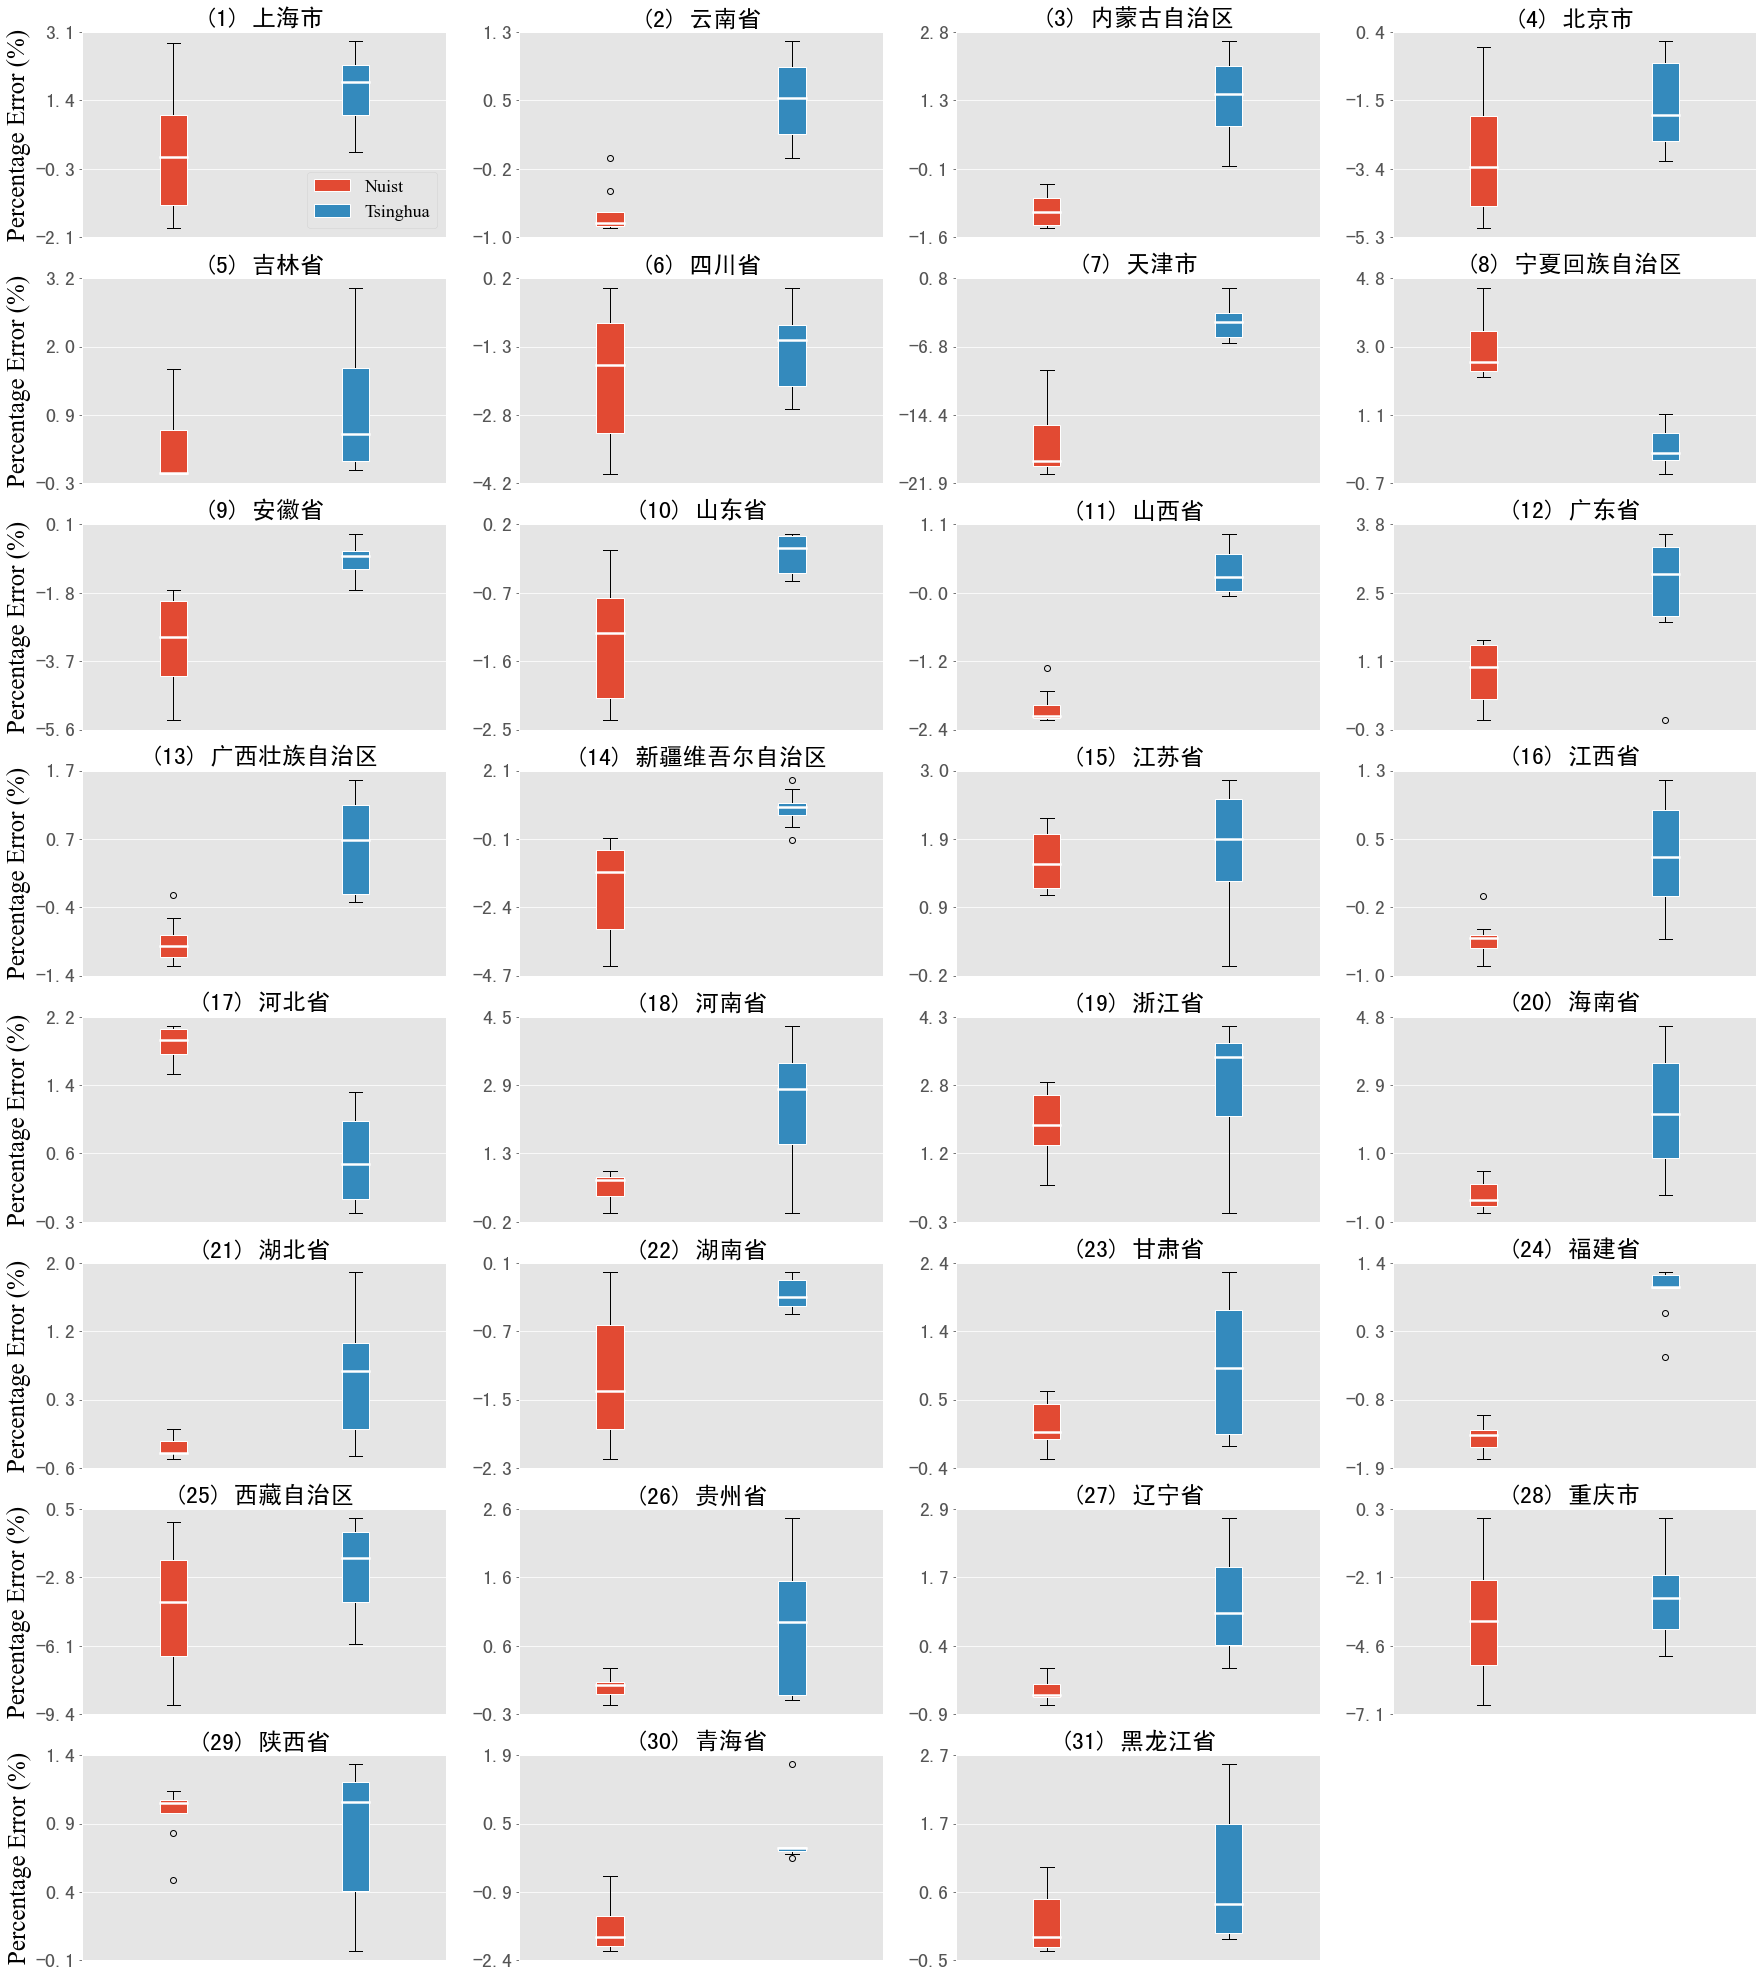

In [141]:
plt.figure(figsize=(30,40))

for i in range(0,31):
    
    ax=plt.subplot(9,4,i+1)

    box1=ax.boxplot(jt_pe.iloc[:,i],vert=True,patch_artist=True,positions=[0],boxprops = {'color':'white','facecolor':'#E24A33'})
    box2=ax.boxplot(th_pe.iloc[:,i],vert=True,patch_artist=True,positions=[1],boxprops = {'color':'white','facecolor':'#348ABD'})

    ax.set_xticks([])
    ax.set_title("({num}) ".format(num=i+1)+pop_province_true.columns.values[i],fontdict={'fontsize':24})
    
    ymin,ymax=ax.get_ylim()
    interval=(ymax-ymin)/3
    ax.set_yticks(np.arange(ymin,ymax+0.1,interval))
   
    plt.tick_params(labelsize=20)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))# 将坐标轴的base number设置为一位

    
    for median in box1['medians']+box2['medians']:
        median.set(color='white',linewidth=2.5)
    if (i == 0):
        ax.legend([box1["boxes"][0], box2["boxes"][0]], ['Nuist','Tsinghua'], loc='best',prop = {'size':18,"family":"Times new roman"})
#         ax.set_xticklabels(['Nuist','Tsinghua'])
#         ax.set_xticks([0,1])
    if(i in np.arange(0,36,4)):
        ax.set_ylabel("Percentage Error (%)",fontdict={"color":"black","size":25,'weight':"heavy","family":"Times new roman"})

        
plt.savefig('population_data/output/box_plot_pe.pdf',dpi=600,bbox_inches='tight')

plt.show()


## 分省APE

In [93]:
jt_ape=pd.read_csv("population_data/0817/jt_ape_provinces.csv",index_col=0)
th_ape=pd.read_csv("population_data/0817/th_ape_provinces.csv",index_col=0)

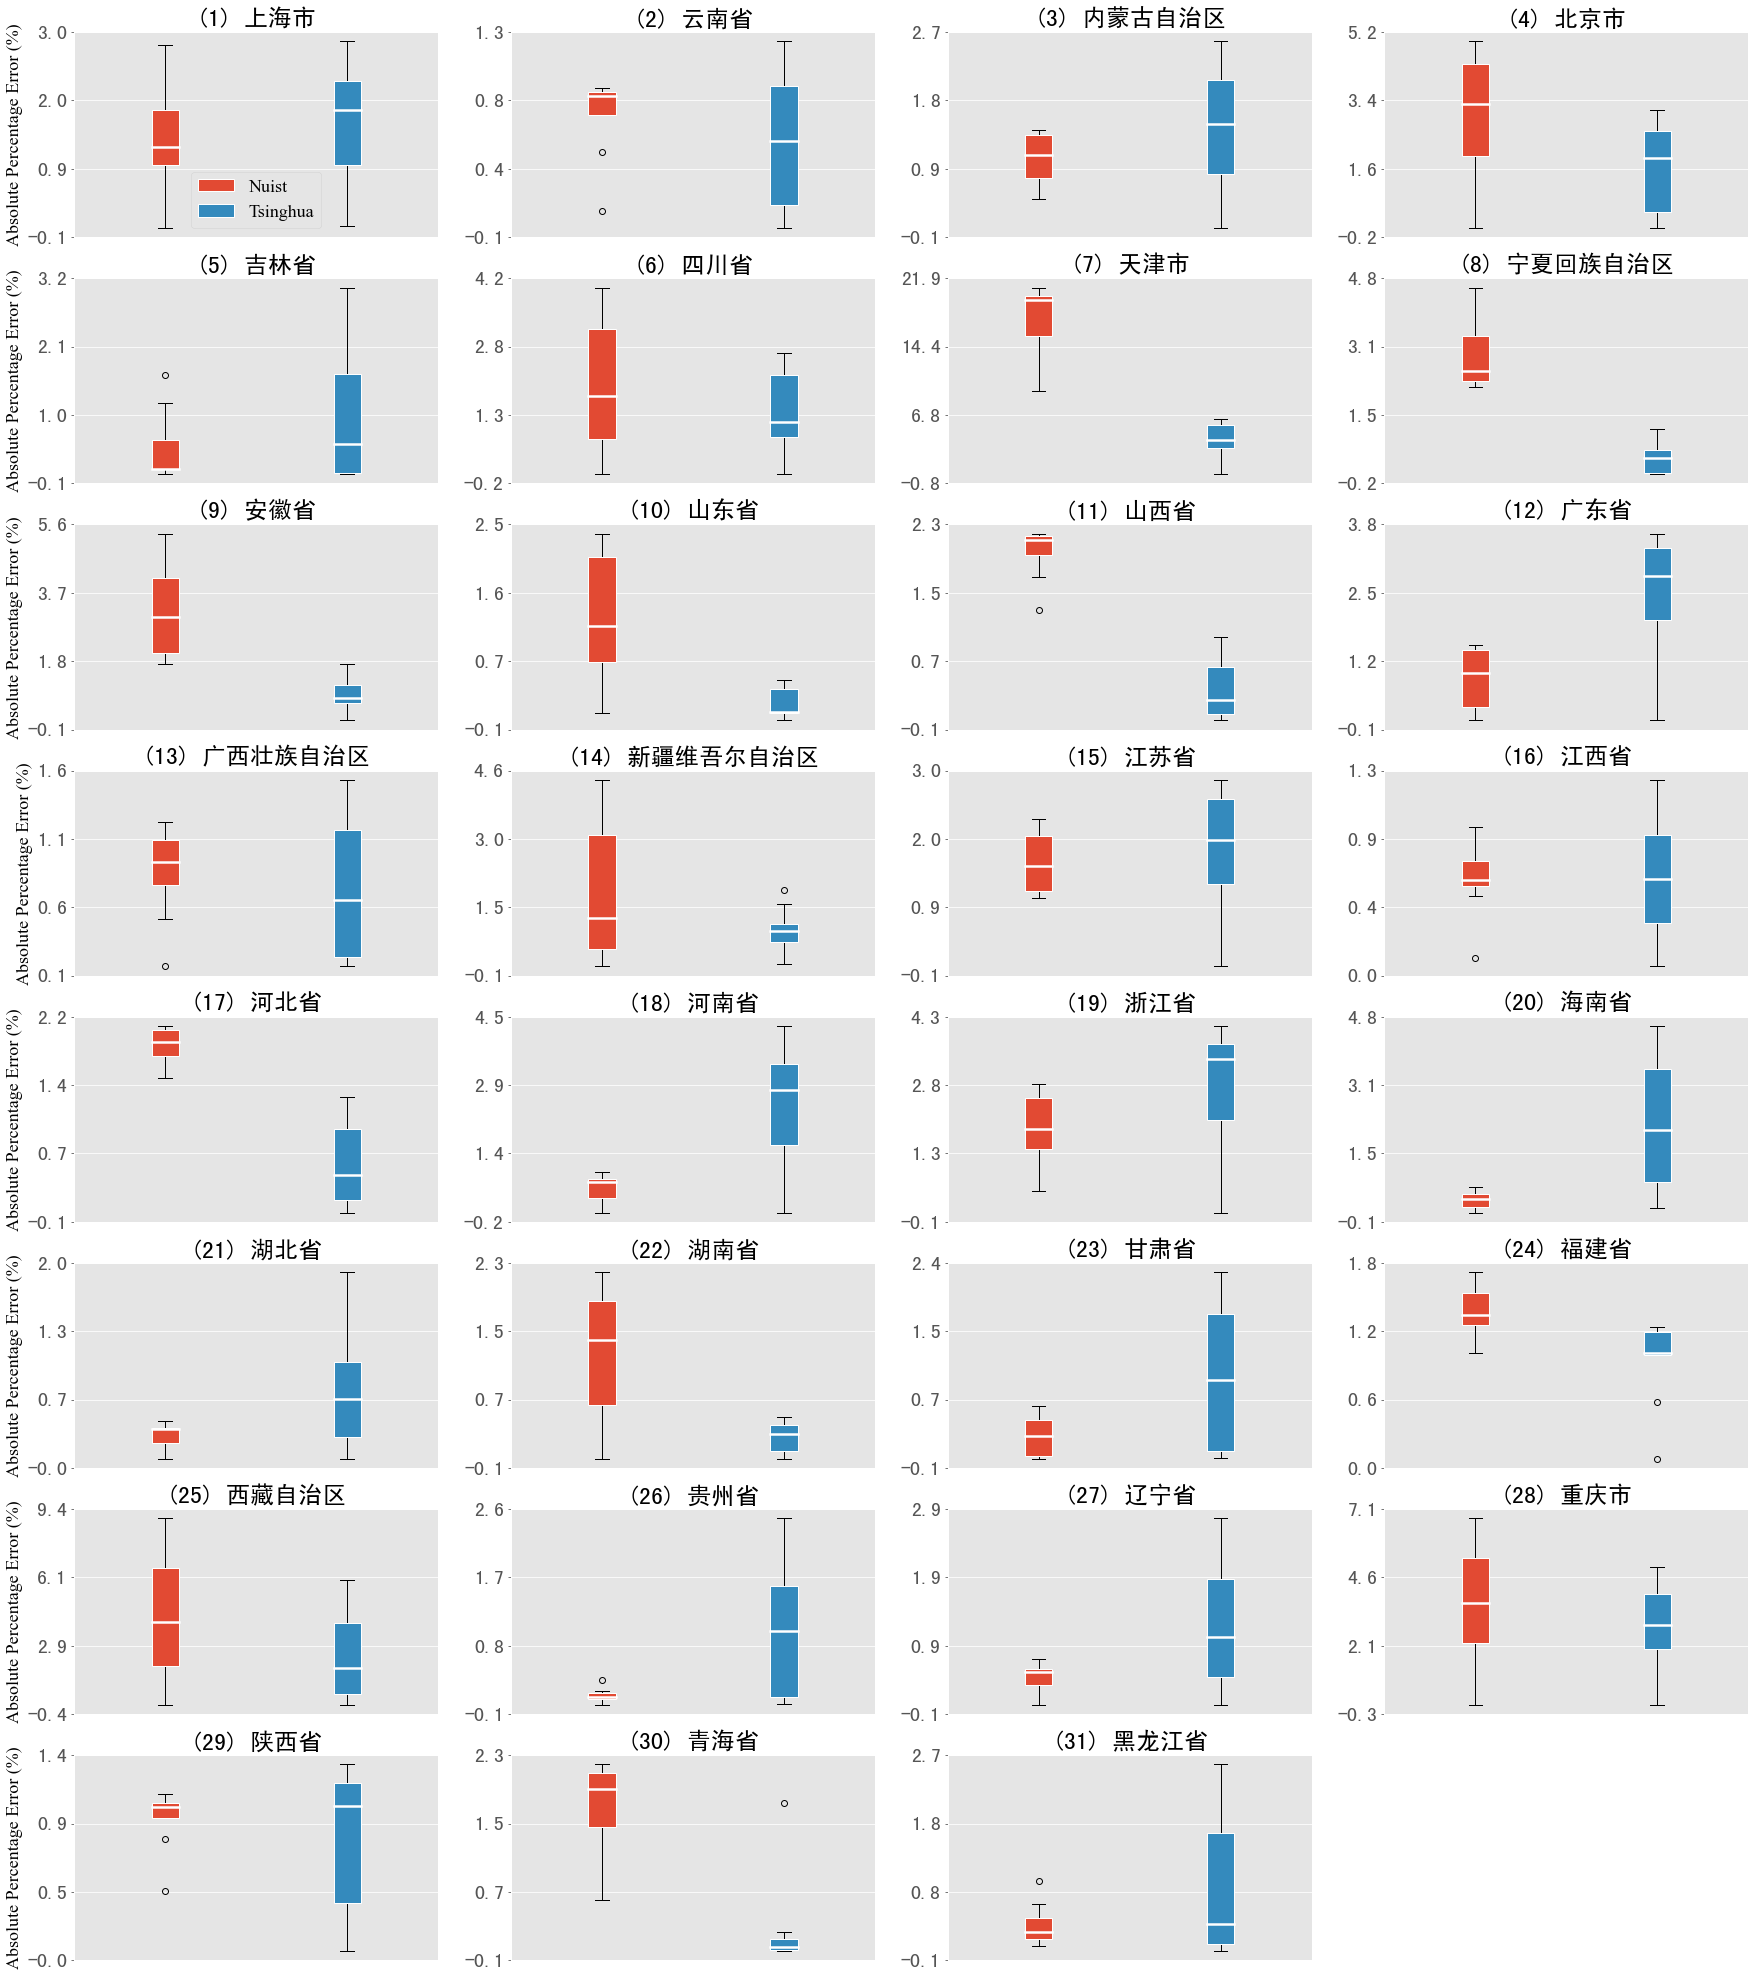

In [142]:
plt.figure(figsize=(30,40))

for i in range(0,31):
    
    ax=plt.subplot(9,4,i+1)

    box1=ax.boxplot(jt_ape.iloc[:,i],vert=True,patch_artist=True,positions=[0],boxprops = {'color':'white','facecolor':'#E24A33'})
    box2=ax.boxplot(th_ape.iloc[:,i],vert=True,patch_artist=True,positions=[1],boxprops = {'color':'white','facecolor':'#348ABD'})

    ax.set_xticks([])
    ax.set_title("({num}) ".format(num=i+1)+pop_province_true.columns.values[i],fontdict={'fontsize':24})
    
    ymin,ymax=ax.get_ylim()
    interval=(ymax-ymin)/3
    ax.set_yticks(np.arange(ymin,ymax+0.1,interval))
   
    plt.tick_params(labelsize=20)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))# 将坐标轴的base number设置为一位

    
    for median in box1['medians']+box2['medians']:
        median.set(color='white',linewidth=2.5)
    if (i == 0):
        ax.legend([box1["boxes"][0], box2["boxes"][0]], ['Nuist','Tsinghua'], loc='best',prop = {'size':18,"family":"Times new roman"})
#         ax.set_xticklabels(['Nuist','Tsinghua'])
#         ax.set_xticks([0,1])
    if(i in np.arange(0,36,4)):
        ax.set_ylabel("Absolute Percentage Error (%)",fontdict={"color":"black","size":18,'weight':"heavy","family":"Times new roman"})

        
plt.savefig('population_data/output/box_plot_ape.pdf',dpi=600,bbox_inches='tight')

plt.show()

# 分省DTW算法

In [187]:
from dtw import *

dtw_province=pd.DataFrame([],columns=['jt','th'],index=pop_true.columns.values)


for j in range(0,31):

    query_jt = jt_pops["ssp{i}".format(i=2)].iloc[0:9:,j].values
    query_th = th_pops["ssp{i}".format(i=2)].iloc[0:9:,j].values

    template = pop_true.iloc[0:9:,j].values*10000



    dtw_province.iloc[j,0]=dtw(query_jt, template, keep_internals=True).distance
    dtw_province.iloc[j,1]=dtw(query_th, template, keep_internals=True).distance


#     alignment.plot("twoway")


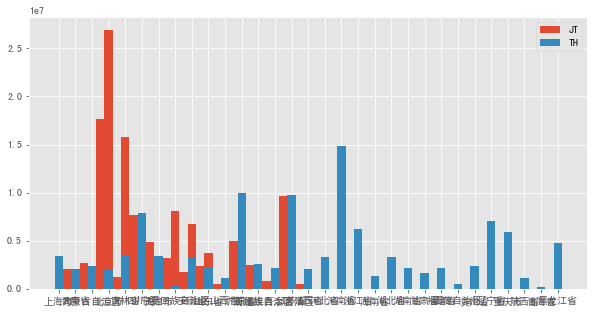

In [188]:

plt.figure(figsize=(10,5))
plt.bar(x=range(0,31),height=dtw_province["jt"], width=1, label='JT')

    
plt.bar(x=range(0,62,2),height=dtw_province["th"], width=1, label='TH',tick_label = dtw_province.index.values)

plt.legend()
plt.show()



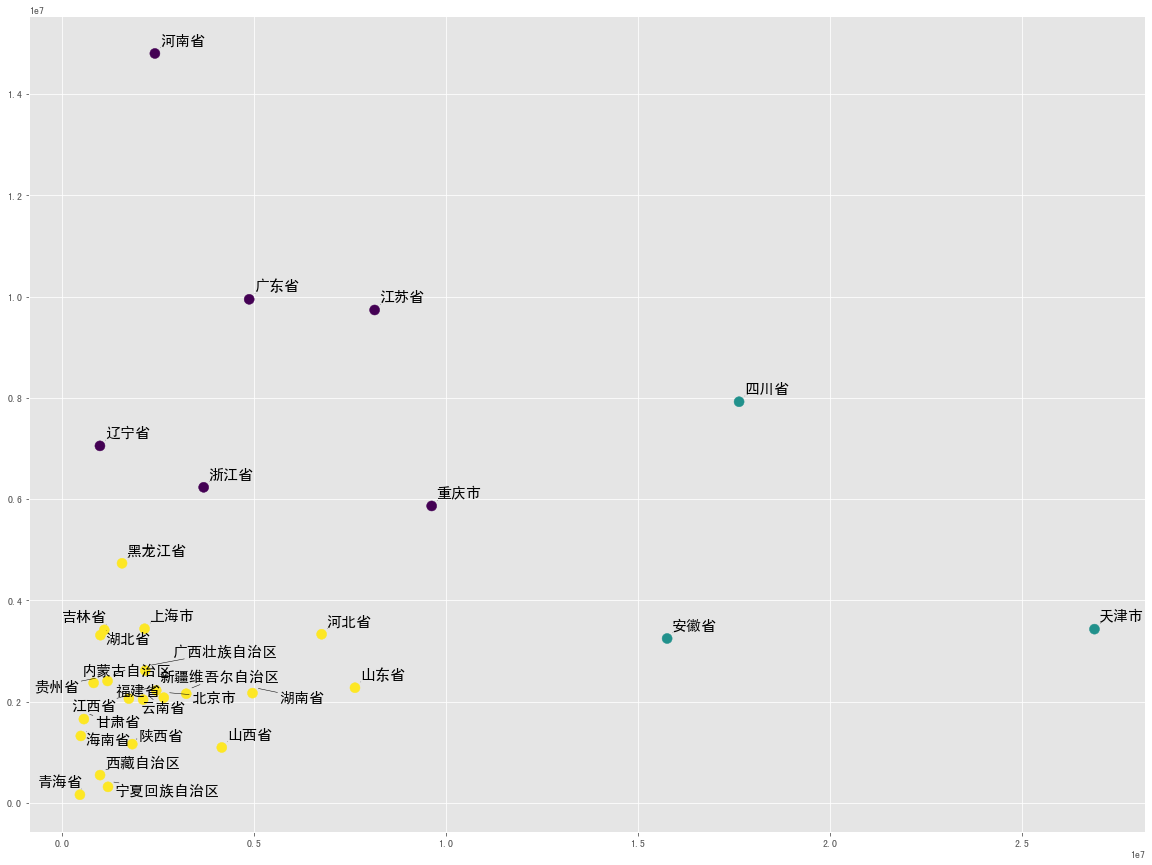

In [233]:
from sklearn.cluster import KMeans
plt.figure(figsize=(20,15))
X = dtw_province.values

y_pred = KMeans(n_clusters=3, random_state=1000).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,s=100)

texts = [plt.text(X[i, 0]+100000, X[i, 1]+100000, dtw_province.index.values[i],size=15) for i in range(X.shape[0])]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='black'))

# plt.savefig("population_data/output/province_class.pdf",dpi=600) 

plt.show()